# Cycling Statistics

## Preliminary Work

### Importing Data and Libraries

In [64]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Import data
garmin = pd.read_csv("activities.csv")

### Data Wrangling

**Remove unnecessary columns and trim dataset down to a cycling dataset**

In [66]:
# Columns to keep
#=================
keep_cols = ['Activity Type', 'Date', 'Elapsed Time', 'Distance', 'Calories',
       'Avg HR', 'Max HR','Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Min Elevation', 'Max Elevation']

garmin = garmin[keep_cols]

# Change activity names
garmin['Activity Type'] = garmin['Activity Type'].replace(['Cardio'], 'Indoor Cycling')

# Remove 'Cycling' Because duplicates made with watch instead of GPS
garmin = garmin[ garmin['Activity Type'] != 'Cycling' ]


# Change date to datetime and create 2022 dataset
#=================================================
garmin["Date"] = pd.to_datetime(garmin["Date"])
garmin["Year"] = garmin["Date"].dt.year
garmin = garmin[garmin["Year"] == 2022]


# Change columns to integer
#===========================
change_int = ['Distance', 'Calories',
              'Total Ascent', 'Total Descent', 
              'Min Elevation', 'Max Elevation']

# Edit strings
garmin[change_int] = garmin[change_int].replace(",","", regex=True)
garmin[change_int] = garmin[change_int].replace("--","0", regex=True)

# Change to float
garmin[change_int] = garmin[change_int].astype(float)


# Change elapsed time to datetime
#=================================
garmin['Elapsed Time'] = pd.to_datetime(garmin['Elapsed Time'], format='%H:%M:%S')
garmin['Elapsed Time'] = garmin['Elapsed Time'].dt.hour*60 + garmin['Elapsed Time'].dt.minute + garmin['Elapsed Time'].dt.second/60
garmin['Elapsed Time'] = round(garmin['Elapsed Time'])

garmin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 148
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Activity Type  148 non-null    object        
 1   Date           148 non-null    datetime64[ns]
 2   Elapsed Time   148 non-null    float64       
 3   Distance       148 non-null    float64       
 4   Calories       148 non-null    float64       
 5   Avg HR         148 non-null    int64         
 6   Max HR         148 non-null    int64         
 7   Avg Pace       148 non-null    object        
 8   Best Pace      148 non-null    object        
 9   Total Ascent   148 non-null    float64       
 10  Total Descent  148 non-null    float64       
 11  Min Elevation  148 non-null    float64       
 12  Max Elevation  148 non-null    float64       
 13  Year           148 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 17.3+ 

**Change column data types**

In [69]:
# Create cycling 2022 dataset
cycling = garmin[ garmin['Activity Type'].isin(["Indoor Cycling", 'Mountain Biking', 'Road Cycling']) ]

#Remove "Year" Column
del cycling["Year"]

cycling.head()

,Activity Type,Date,Elapsed Time,Distance,Calories,Avg HR,Max HR,Avg Pace,Best Pace,Total Ascent,Total Descent,Min Elevation,Max Elevation
1,Mountain Biking,2022-12-14 09:17:47,69.0,12.81,916.0,153,188,11.2,28.7,175.0,174.0,158.0,267.0
9,Road Cycling,2022-11-25 13:09:59,63.0,18.38,559.0,0,0,21.0,30.2,29.0,34.0,-2.0,11.0
19,Indoor Cycling,2022-11-07 13:18:34,31.0,0.00,245.0,112,145,--,--,0.0,0.0,0.0,0.0
25,Road Cycling,2022-10-08 16:24:24,105.0,14.42,424.0,0,0,19.8,38.9,35.0,33.0,-0.0,9.0
26,Road Cycling,2022-10-08 11:57:42,148.0,15.65,502.0,0,0,6.4,30.6,48.0,50.0,4.0,118.0


## Statistics

### Totals

**Total statistics for outdoor cycling**

In [72]:
cycling_out = cycling[ cycling['Activity Type'].isin(['Road Cycling', 'Mountain Biking']) ]

sum_cols = ['Distance', 'Calories', 'Elapsed Time',
            'Total Ascent', 'Total Descent']

cycling_out[sum_cols].sum()

Distance           312.41
Calories         14964.00
Elapsed Time      2207.00
Total Ascent      4087.00
Total Descent     4035.00
dtype: float64

**Statistics for all cycling**

In [73]:
cycling[sum_cols].sum()

Distance           481.87
Calories         23330.00
Elapsed Time      2959.00
Total Ascent      6539.00
Total Descent     4035.00
dtype: float64

## Graphics

### Bar Plot

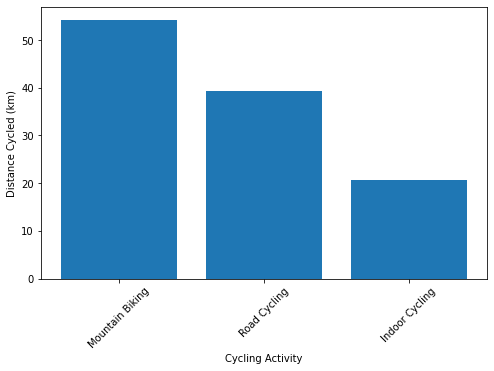

In [81]:
fig_bar = plt.subplots(figsize=(8,5))
plt.bar(cycling['Activity Type'], cycling['Distance'])
plt.xticks(rotation=45)
plt.xlabel("Cycling Activity")
plt.ylabel("Distance Cycled (km)");